# Data Preprocessing

We rarely receive data that are immediately amenable to analysis. They arrive in various data formats and types, in a variety of shapes and sizes, and are often incomplete or messy. This module will take you through the steps from importing the dataset into Python through to ensuring that your data are on the appropriate scale and do not contain missing values prior to analysis.

## Importing data

## Scaling

It is important with many kernels to **scale** the features prior to using them in a SVM. This is because features which are numerically large relative to the others will tend to dominate the norm. So that each feature is able to contribute equally to the selection of the decision boundary, we want them all to have approximately the same range.

In general, standardization of datasets is a common pratice for statistical learning algorithms. We often ignore the shape of the data distribution and simply center it on the mean, then scale it by dividing by their standard deviation (unless the feature is constant). This is important because the objective function in several learning algorithms (*e.g.* the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features.

Scikit-learn's `preprocessing` module provides a `scale` function to perform this operation on a single array-like dataset:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
from sklearn import preprocessing

X = np.array([[ 1., -1.,  2.],
                [ 2.,  0.,  0.],
                [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
X_scaled                                          

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

Scaled data has zero mean and unit variance:

In [3]:
X_scaled.mean(0)

array([ 0.,  0.,  0.])

In [4]:
X_scaled.std(0)

array([ 1.,  1.,  1.])

The `preprocessing` module also provides a utility class called `StandardScaler` that allows for the computation of the mean and standard deviation on a training set. This allows one to later *reapply* the same transformation on validation and test sets.

In [5]:
scaler = preprocessing.StandardScaler().fit(X) ### need to fit then scale as need ot do same rati oof scaling on test and fitting data
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaler.mean_                                      

array([ 1.        ,  0.        ,  0.33333333])

In [7]:
scaler.scale_                                       

array([ 0.81649658,  0.81649658,  1.24721913])

In [8]:
scaler.transform(X)               

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

So then, for new data, we can simply apply the `scaler` object's `transform` method:

In [9]:
scaler.transform([[-1.,  1., 0.]]) 

array([[-2.44948974,  1.22474487, -0.26726124]])

Optionally, one can disable either centering or scaling by passing `with_mean=False` or `with_std=False`, respectively.

Let's have a look at how the `StandardScaler` transforms a randomly-generated dataset.

Here is the original data, which includes two features on different scales.

In [10]:
from sklearn.datasets import make_blobs

In [11]:
X_raw, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X_raw += 3
X_raw[:, 1] *= 5

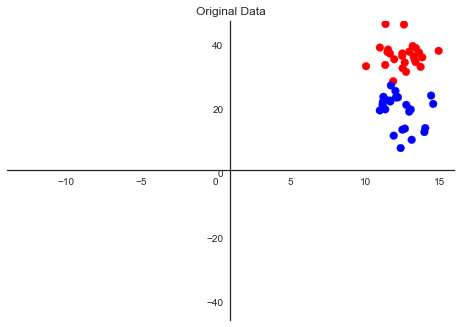

In [12]:
def format_axes(ax):
    
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    return ax


raw_plot = plt.scatter(X_raw[:, 0], X_raw[:, 1], c=y, cmap='bwr', s=60)

maxx = np.abs(X_raw[:, 0]).max()
maxy = np.abs(X_raw[:, 1]).max()

ax = format_axes(raw_plot.axes)

ax.set_xlim(-maxx + 1, maxx + 1)
ax.set_ylim(-maxy + 1, maxy + 1)
ax.set_title("Original Data");

In [13]:
def plot_scaled(X, y, scaler):

    X_scaled = scaler.fit_transform(X)

    scaled_plot = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', s=60)

    ax = format_axes(scaled_plot.axes)

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__);

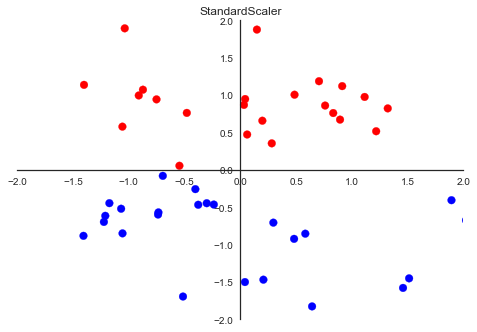

In [14]:
plot_scaled(X_raw, y, scaler)

### Range scaling

An alternative standardization is scaling features to lie between a given minimum and maximum value (typically between zero and one). This is often the case where we want robustness to very small standard deviations of features or we want to preserve zero entries in sparse data.

The `MinMaxScaler` provides this scaling.

In [81]:
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit_transform(X)

array([[ 0.        ,  0.66666667,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.33333333,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.        ,  0.33333333,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.66666667,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.66666667,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

The same instance of the transformer can then be applied to some new test data, which results in the same scaling and shifting operations:

In [82]:
X_test = np.array([[ -3., -1.,  4.]]) #### this was out of orig scale so end up not getting betwene 0 and 1
min_max_scaler.transform(X_test)

ValueError: operands could not be broadcast together with shapes (1,3) (7,) (1,3) 

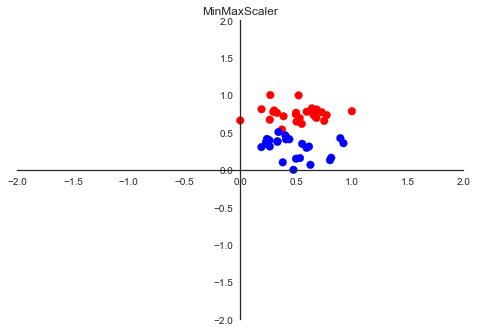

In [19]:
plot_scaled(X_raw, y, min_max_scaler)

### Normalization

Normalization is the process of scaling individual samples to have unit norm. This is useful if you plan to use a quadratic function such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

The function `normalize` performs this operation on a single array-like dataset, either using the l1 or l2 norms:

In [20]:
preprocessing.normalize(X, norm='l2')

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [21]:
preprocessing.normalize(X, norm='l1')

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

As with scaling, there is also a `Normalizer` class that can be used to establish normalization with respect to a training set.

In [22]:
normalizer = preprocessing.Normalizer().fit(X)

In [23]:
normalizer.transform(X_test)

array([[-0.58834841, -0.19611614,  0.78446454]])

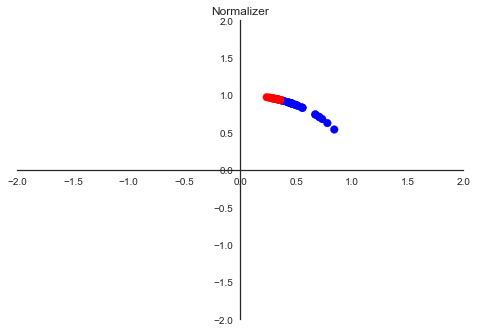

In [24]:
plot_scaled(X_raw, y, normalizer)

### Robust scaling

If our dataset contains values that are known **outliers**, we may want to perform analyses that are robust to them. It is usually a poor strategy to remove outliers from the dataset -- it is much better to *model* the outliers, unless you know they are bad values due to some mistake in the generation or recording of the data. 

As we saw above, rescaling is typically done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean and variance disproportionaltely. In such cases, the median and the interquartile range often give better results.

The `RobustScaler` rescales the dataset using statistics that are robust to outliers. Namely, it removes the median and scales the data according to the quantile range. Centering and scaling happen independently on each feature (or each sample, depending on the axis argument) by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

In [25]:
robust_scaler = preprocessing.RobustScaler()

robust_scaler.fit_transform(X)

array([[ 0.        , -1.        ,  1.33333333],
       [ 1.        ,  0.        ,  0.        ],
       [-1.        ,  1.        , -0.66666667]])

Let's modify our random dataset to include some outliers:

In [26]:
X_outlier = np.vstack([X_raw, [[7., -14.], [14, 85]]])
y_outlier = np.append(y, [0, 1])

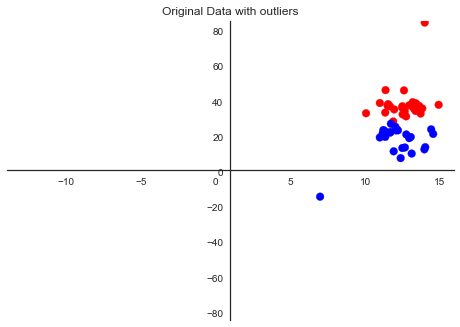

In [27]:
outlier_plot = plt.scatter(*X_outlier.T, c=y_outlier, cmap='bwr', s=60)

maxx = np.abs(X_outlier[:, 0]).max()
maxy = np.abs(X_outlier[:, 1]).max()

ax = format_axes(outlier_plot.axes)

ax.set_xlim(-maxx + 1, maxx + 1)
ax.set_ylim(-maxy + 1, maxy + 1)
ax.set_title("Original Data with outliers");

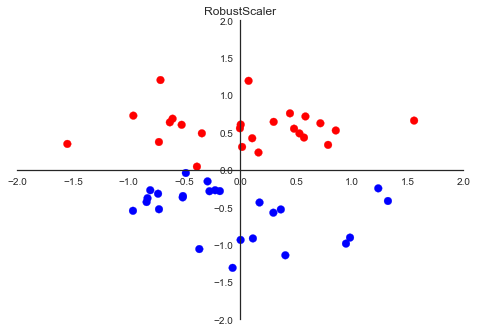

In [28]:
plot_scaled(X_outlier, y_outlier, robust_scaler)

### Categorical feature encoding - when not ordinal catagorical! (i.e. usa is not better than euro etc)

Often features are not given as continuous values, but rather as categorical classes. For example, variables may be defined as `["male", "female"]`, `["Europe", "US", "Asia"]`, `["Disease A", "Disease B", "Disease C"]`. Such features can be efficiently coded as integers, for instance `["male", "US", "Disease B"]` could be expressed as `[0, 1, 1]`.

Unfortunately, an integer representation can not be used directly with estimators in scikit-learn, because these expect *continuous* input, and would therefore interpret the categories as being ordered, which for the above examples, would be inappropriate.

One approach is to use a "one-of-K" or "one-hot" encoding, which is implemented in `OneHotEncoder`. This estimator transforms a categorical feature with `m` possible values into `m` binary features, with only one active.

In [64]:
pd.DataFrame([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

,0,1,2
0,0,0,3
1,1,1,0
2,0,2,1
3,1,0,2


In [74]:
enc = preprocessing.OneHotEncoder() ####n_vlaues = 5 sets the number of catagories, if there was some in training data set but in test or vice versa

In [75]:
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [76]:
enc.transform([[0, 1, 3]]).toarray()

array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [79]:
enc.transform([[1, 2, 0]]).toarray()

array([[ 0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.]])

By default, the cardinality of each feature is inferred automatically from the dataset; this can be manually overriden using the `n_values` argument.

`LabelBinarizer` is a utility class to help create a label indicator matrix from a list of multi-class labels:

In [32]:
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [33]:
lb.classes_

array([1, 2, 4, 6])

In [34]:
lb.transform((1,4))

array([[1, 0, 0, 0],
       [0, 0, 1, 0]])

For multiple labels per instance, use MultiLabelBinarizer:

In [88]:
lb = preprocessing.MultiLabelBinarizer() ##imortant in interactio neffects
lb.fit_transform([(1, 2), (4,)])

array([[1, 1, 0],
       [0, 0, 1]])

In [36]:
lb.classes_

array([1, 2, 3])

`LabelEncoder` is a utility class to help normalize labels such that they contain only consecutive values between 0 and `n_classes-1`.

In [37]:
le = preprocessing.LabelEncoder()
le.fit([1,2,2,6])

LabelEncoder()

In [38]:
le.classes_

array([1, 2, 6])

In [39]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [40]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

## Missing Data Imputation

Missing data is a common problem in most real-world scientific datasets. While the best way for dealing with missing data will always be preventing their occurrence in the first place, it usually can't be helped, particularly when data are collected passively or voluntarily, or when data collection and recording is distributed among several people. There are a variety of ways for dealing with missing data, from the very naïve to the very sophisticated, and unfortunately the more common approaches tend to be *ad hoc* and will usually do more harm than good. 

It turns out that more robust methods for imputation are not as difficult to implement as they first appear to be. Two of the best ones are Bayesian imputation and multiple imputation. In this section, we will use **multiple imputation** to account for missing data in a regression analysis. 

As a motivating example, we will use a dataset of educational outcomes for children with hearing impairment. Here, we are interested in determining factors that are associated with better or poorer learning outcomes. 

![hearing aid](images/hearing_aid.jpg)

There is a suite of available predictors, including: 

* gender (`male`)
* number of siblings in the household (`siblings`)
* index of family involvement (`family_inv`)
* whether the primary household language is not English (`non_english`)
* presence of a previous disability (`prev_disab`)
* non-white race (`non_white`)
* age at the time of testing (in months, `age_test`)
* whether hearing loss is not severe (`non_severe_hl`)
* whether the subject's mother obtained a high school diploma or better (`mother_hs`)
* whether the hearing impairment was identified by 3 months of age (`early_ident`).

In [41]:
test_scores = pd.read_csv('../data/test_scores.csv', index_col=0)
test_scores.head()

,score,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
0,40,0,2.0,2.0,False,NaN,55,1.0,NaN,False,False
1,31,1,0.0,NaN,False,0.0,53,0.0,0.0,False,False
2,83,1,1.0,1.0,True,0.0,52,1.0,NaN,False,True
3,75,0,3.0,NaN,False,0.0,55,0.0,1.0,False,False
5,62,0,0.0,4.0,False,1.0,50,0.0,NaN,False,False


For three variables in the dataset, there are incomplete records.

In [42]:
test_scores.isnull().sum(0)

score             0
male              0
siblings          0
family_inv       33
non_english       0
prev_disab       18
age_test          0
non_severe_hl     0
mother_hs        73
early_ident       0
non_white         0
dtype: int64

### Strategies for dealing with missing data

The easiest (and worst) way to deal with missing data is to **ignore it**. That is, simply run the analysis, missing values and all, hoping for the best. If your software is any good, this approach will simply not work; the algorithm will try to operate on data that includes missing values, and propagate them, resulting in statistics and estimates that cannot be calculated, which will typically raise errors. If your software is poor, it will make some assumption or decision about the missing values, and proceed to generate  results conditional on the assumption, which creates problems that may never be detected because no indication was given to any potential problem. 

The next easiest (worst) approach to analyzing data with missing values is to conduct list-wise deletion, by deleting the records that have missing values. This is called **complete case analysis**, because only records that are complete get retained for the analysis. The degree to which complete case analysis is undesirable depends on the mechanism by which data have become missing.

### Types of Missingness

- **Missing completely at random (MCAR)**: When data are MCAR, missing cases are, on average, identical to non-missing cases, with respect to the model. Ignoring the missingness will reduce the power of the analysis, but will not bias inference.
- **Missing at random (MAR)**: Missing data depends (usually probabilistically) on measured values, and hence can be modeled by variables observed in the data set. Accounting for the values which “cause” the missing data will produce unbiased results in an analysis.
- **Missing not at random(MNAR)**: Missing data depend on unmeasured or unknown variables. There is no information available to account for the missingness.

The very best-case scenario for using complete case analysis, which corresponds to MCAR missingness, results in a **loss of power** due to the reduction in sample size. The analysis will lose the information contained in the non-missing elements of a partially-missing record. When data are not missing completely at random, inferences from complete case analysis may be **biased** due to systematic differences between missing and non-missing records that affects the estimates of key parameters.

One alternative to complete case analysis is to simply fill (*impute*) the missing values with a reasonable guess a the true value, such as the mean, median or modal value of the fully-observed records. This imputation, while not recovering any information regarding the missing value itself for use in the analysis, does provide a mechanism for including the non-missing values in the analysis, thereby making use of all available information.

The `Imputer` class in scikit-learn provides methods for imputing missing values, either using the mean, the median or the most frequent value of the row or column in which the missing values are located. This class also allows for different missing value encodings.

For example, we can replace missing entries encoded as `np.nan` using the mean value of the columns (axis 0) that contain the missing values:

In [43]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0) # impoting based on col, but axis=0 is per row?

In [44]:
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [45]:
X = [[np.nan, 1], [6, np.nan], [3, 6]]
imp.transform(X)

array([[ 4.        ,  1.        ],
       [ 6.        ,  3.66666667],
       [ 3.        ,  6.        ]])

In our educational outcomes dataset, we are probably better served using mode imputation:

In [46]:
mode_imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

In [47]:
mode_imp.fit(test_scores)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [48]:
mode_imp.transform(test_scores)[:3]

array([[ 40.,   0.,   2.,   2.,   0.,   0.,  55.,   1.,   1.,   0.,   0.],
       [ 31.,   1.,   0.,   0.,   0.,   0.,  53.,   0.,   0.,   0.,   0.],
       [ 83.,   1.,   1.,   1.,   1.,   0.,  52.,   1.,   1.,   0.,   1.]])

Of course, in Python it is often easier to impute data using Pandas `DataFrame` method `fillna`.

In [49]:
test_scores.siblings.mean()

1.1256038647342994

In [51]:
siblings_imputed = test_scores.siblings.fillna(test_scores.siblings.mean()) # same as above

This approach may be reasonable under the MCAR assumption, but may induce bias under a MAR scenario, whereby missing values may **differ systematically** relative to non-missing values, making the particular summary statistic used for imputation *biased* as a mean/median/modal value for the missing values.

Beyond this, the use of a single imputed value to stand in place of the actual missing value glosses over the **uncertainty** associated with this guess at the true value. Any subsequent analysis procedure (*e.g.* regression analysis) will behave as if the imputed value were observed, despite the fact that we are actually unsure of the actual value for the missing variable. The practical consequence of this is that the variance of any estimates resulting from the imputed dataset will be **artificially reduced**.

## Multiple Imputation

One robust alternative to addressing missing data is **multiple imputation** (Schaffer 1999, van Buuren 2012). It produces unbiased parameter estimates, while simultaneously accounting for the uncertainty associated with imputing missing values. It is conceptually and mechanistically straightforward, and produces complete datasets that may be analyzed using any statistical methodology or software one chooses, as if the data had no missing values to begin with.

Multiple imputation generates imputed values based on a **regression model**. This regression model will help us generate reasonable values, particularly if data are MAR, since it uses information in the dataset that may be informative in predicting what the true value may be. Ideally, we want predictor variables that are **correlated** with the missing variable, and with the mechanism of missingness, if any. For example, one might be able to use test scores from one subject to predict missing test scores from another; or, the probability of income reporting to be missing may vary systematically according to the education level of the individual.

To see if there is any potential information among the variables in our dataset to use for imputation, it is helpful to calculate the pairwise correlation between all the variables. Since we have discrete variables in our data, the [Spearman rank correlation coefficient](http://www.wikiwand.com/en/Spearman%27s_rank_correlation_coefficient) is appropriate.

In [52]:
test_scores.dropna().corr(method='spearman')

,score,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
score,1.000000,0.073063,-0.085044,-0.539019,-0.278798,-0.184426,0.024057,0.140305,0.228500,0.222711,-0.345061
male,0.073063,1.000000,-0.072006,-0.008714,0.053338,-0.052054,-0.081165,0.031825,0.050372,-0.007690,-0.048638
siblings,-0.085044,-0.072006,1.000000,0.078471,-0.049989,-0.038020,0.104905,-0.003689,0.096268,0.077318,0.006234
family_inv,-0.539019,-0.008714,0.078471,1.000000,0.221696,0.082314,-0.029120,-0.092815,-0.358898,0.006370,0.401617
non_english,-0.278798,0.053338,-0.049989,0.221696,1.000000,-0.021996,0.068095,-0.047775,-0.199639,-0.015812,0.225428
prev_disab,-0.184426,-0.052054,-0.038020,0.082314,-0.021996,1.000000,0.136604,0.048132,0.137893,0.046592,-0.021367
age_test,0.024057,-0.081165,0.104905,-0.029120,0.068095,0.136604,1.000000,-0.122811,0.016760,0.033789,0.068430
non_severe_hl,0.140305,0.031825,-0.003689,-0.092815,-0.047775,0.048132,-0.122811,1.000000,-0.015996,0.008211,0.028480
mother_hs,0.228500,0.050372,0.096268,-0.358898,-0.199639,0.137893,0.016760,-0.015996,1.000000,0.024411,-0.214209
early_ident,0.222711,-0.007690,0.077318,0.006370,-0.015812,0.046592,0.033789,0.008211,0.024411,1.000000,-0.022854


We will try to impute missing values the mother's high school education indicator variable, which takes values of 0 for no high school diploma, or 1 for high school diploma or greater. The appropriate model to predict binary variables is a **logistic regression**. We will use the scikit-learn implementation, `LogisticRegression`.

In [53]:
from sklearn.linear_model import LogisticRegression

To keep things simple, we will only use variables that are themselves complete to build the predictive model, hence our subset of predictors will exclude family involvement score (`family_inv`) and previous disability (`prev_disab`).

In [54]:
impute_subset = test_scores.drop(labels=['family_inv','prev_disab','score'], axis=1)

Next, we scale the predictor variables to range from 0 to 1, to improve the performance of the regression model.

In [55]:
y = impute_subset.pop('mother_hs').values
X = preprocessing.StandardScaler().fit_transform(impute_subset.astype(float))

Next, we create a `LogisticRegression` model, and fit it using the non-missing observations.

In [56]:
missing = np.isnan(y)

mod = LogisticRegression()
mod.fit(X[~missing], y[~missing])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
mother_hs_pred = mod.predict(X[missing])
mother_hs_pred

array([ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.])

These values can then be inserted in place of the missing values, and an analysis can be performed on the entire dataset.

However, this is still just a single imputation for each missing value, and hence glosses over the uncertainty associated with the derivation of the imputes. Multiple imputation proceeds by **imputing several values**, to generate several complete datasets and performing the same analysis on all of them. With a set of estimates in hand, an *average* estimate of model parameters can be obtained that more adequately accounts for the uncertainty, hopefully providing more robust inference than from a single impute.

There are a variety of ways to generate multiple imputations. Here, we will exploit **regularization** in order to do this. The `LogisticRegression` class from scikit-learn provides facilities for regularization using either L2 (resulting in ridge regression) or L1 (resulting in LASSO regression) penalties. The degree of regularization in either case is controlled by the `C` parameter, whereby large values of `C` give more freedom to the model, while smaller values of `C` constrain the model more. We can use a selection of `C` values to obtain a range of predictions from variants of the same model. For example:

In [58]:
mod2 = LogisticRegression(C=1, penalty='l1')
mod2.fit(X[~missing], y[~missing])
mod2.predict(X[missing])

array([ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.])

In [59]:
mod3 = LogisticRegression(C=0.4, penalty='l1')
mod3.fit(X[~missing], y[~missing])
mod3.predict(X[missing])

array([ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Surprisingly few imputations are required to acheive reasonable estimates, with 3-10 usually sufficient. We will use 3.

In [60]:
mother_hs_imp = []

for C in 0.1, 0.4, 2:
    
    mod = LogisticRegression(C=C, penalty='l1')
    mod.fit(X[~missing], y[~missing])
    imputed = mod.predict(X[missing])
    mother_hs_imp.append(imputed)

In [61]:
mother_hs_imp

[array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         0.,  1.,  1.,  

#### 
then would run each model with these imputations and compare each (kinda a sensitivity study)?